In [5]:
#Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
import scipy.stats as stats
import math
from pandas import Grouper
import calendar
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 20})

In [6]:
# Loading Nairobi data
Nairobi_df=pd.read_excel("BAM data Nairobi",header=1)
Nairobi_df.head()

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8


In [7]:
# There are no missing values in the dataset
Nairobi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          6285 non-null   object 
 1   Conc (mg/m3)  6285 non-null   float64
 2   Qtot (m3)     6285 non-null   float64
 3   WS (MPS)      6285 non-null   float64
 4   RH (%)        6285 non-null   int64  
 5   AT (C)        6285 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 294.7+ KB


In [8]:
# Renaming the time stamp and converting it to Datetime datatype
Nairobi_df['Time']=pd.to_datetime(Nairobi_df['Time'])
Nairobi_df

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8
...,...,...,...,...,...,...
6280,2022-09-02 09:00:00,0.027,0.700,7.9,32,15.8
6281,2022-09-02 10:00:00,0.039,0.700,8.0,32,16.4
6282,2022-09-02 11:00:00,0.047,0.700,8.1,33,17.0
6283,2022-09-02 12:00:00,0.049,0.700,8.2,32,18.7


# Data dimension check

In [9]:
# Checking the data dimensions
def dim_check(df):
    print(df.shape)
    print("*"* 50)
    print(df.info())

In [10]:
dim_check(Nairobi_df)

(6285, 6)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          6285 non-null   datetime64[ns]
 1   Conc (mg/m3)  6285 non-null   float64       
 2   Qtot (m3)     6285 non-null   float64       
 3   WS (MPS)      6285 non-null   float64       
 4   RH (%)        6285 non-null   int64         
 5   AT (C)        6285 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 294.7 KB
None


# Extracting timestamps

In [11]:
from datetime import datetime, timedelta
def extract_timesteps(df):
    #Extracting time stamp details 
    dt=datetime.today()
    #Extracting day of the year and month of the month
    # Hour of the day
    df['hour']=df['Time'].dt.hour
    # Day of the Month
    df['day']=df['Time'].dt.day
    # Day of the week
    df['day_of_week']=df['Time'].dt.day_of_week
    # Month of the year
    df['month']=df['Time'].dt.month
    # Day of the year
    df['day_of_year']=df['Time'].dt.day_of_year
    # Extracting a column for weekday and weekend
    df['weekday_weekend']=df['day_of_week'].apply (lambda x : 1 if x<=4 else 0)
    return df

In [12]:
# Extracting time steps
extract_timesteps(Nairobi_df)

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),hour,day,day_of_week,month,day_of_year,weekday_weekend
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3,16,14,1,12,348,1
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8,17,14,1,12,348,1
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5,18,14,1,12,348,1
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1,19,14,1,12,348,1
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8,20,14,1,12,348,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2022-09-02 09:00:00,0.027,0.700,7.9,32,15.8,9,2,4,9,245,1
6281,2022-09-02 10:00:00,0.039,0.700,8.0,32,16.4,10,2,4,9,245,1
6282,2022-09-02 11:00:00,0.047,0.700,8.1,33,17.0,11,2,4,9,245,1
6283,2022-09-02 12:00:00,0.049,0.700,8.2,32,18.7,12,2,4,9,245,1


In [13]:
Nairobi_df.iloc[90:100:,]

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),hour,day,day_of_week,month,day_of_year,weekday_weekend
90,2021-12-18 10:00:00,0.985,0.0,10.9,33,22.1,10,18,5,12,352,0
91,2021-12-18 11:00:00,0.985,0.0,10.9,33,23.4,11,18,5,12,352,0
92,2021-12-18 12:00:00,0.985,0.0,10.9,33,24.1,12,18,5,12,352,0
93,2021-12-18 13:00:00,0.985,0.0,10.8,33,24.9,13,18,5,12,352,0
94,2021-12-18 14:00:00,0.985,0.0,10.7,33,25.7,14,18,5,12,352,0
95,2021-12-18 15:00:00,0.985,0.0,10.6,33,26.5,15,18,5,12,352,0
96,2021-12-18 16:00:00,0.985,0.0,10.4,33,25.1,16,18,5,12,352,0
97,2021-12-18 17:00:00,0.985,0.0,10.2,33,24.4,17,18,5,12,352,0
98,2021-12-18 18:00:00,0.985,0.0,10.1,32,23.8,18,18,5,12,352,0
99,2021-12-18 19:00:00,0.985,0.0,9.9,32,22.7,19,18,5,12,352,0


# Data Completeness check

In [14]:
# Data quality issues
def data_anomalies(df):
    #Checking for duplicated columns
    dups_num=df.duplicated().sum()
    print(f"We have {dups_num} duplicates in our dataset")
    print("*"*50)
    #Checking for missing values
    print("The percentage of missing values per column is")
    print((df.isnull().sum()/len(df))*100)

In [15]:
# Checking for data anomalies in the dataset
data_anomalies(Nairobi_df)

We have 0 duplicates in our dataset
**************************************************
The percentage of missing values per column is
Time               0.0
Conc (mg/m3)       0.0
Qtot (m3)          0.0
WS (MPS)           0.0
RH (%)             0.0
AT (C)             0.0
hour               0.0
day                0.0
day_of_week        0.0
month              0.0
day_of_year        0.0
weekday_weekend    0.0
dtype: float64


#### No missing data detected in the dataset

# Anomally detection

In [16]:
# Dropping rows with a concentration 0.985
Nairobi_clean=Nairobi_df[Nairobi_df['Conc (mg/m3)']!=0.985]


## Hourly Patterns for the entire Monitoring Period

### Resampling hourly to see duplicates and missing values

In [17]:
data_anomalies(Nairobi_clean)

We have 0 duplicates in our dataset
**************************************************
The percentage of missing values per column is
Time               0.0
Conc (mg/m3)       0.0
Qtot (m3)          0.0
WS (MPS)           0.0
RH (%)             0.0
AT (C)             0.0
hour               0.0
day                0.0
day_of_week        0.0
month              0.0
day_of_year        0.0
weekday_weekend    0.0
dtype: float64


### Getting rid of duplicates within the datset

In [18]:
Nairobi_clean.drop_duplicates(inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Outliers detected in the Particulate matter readings

# Daily Average

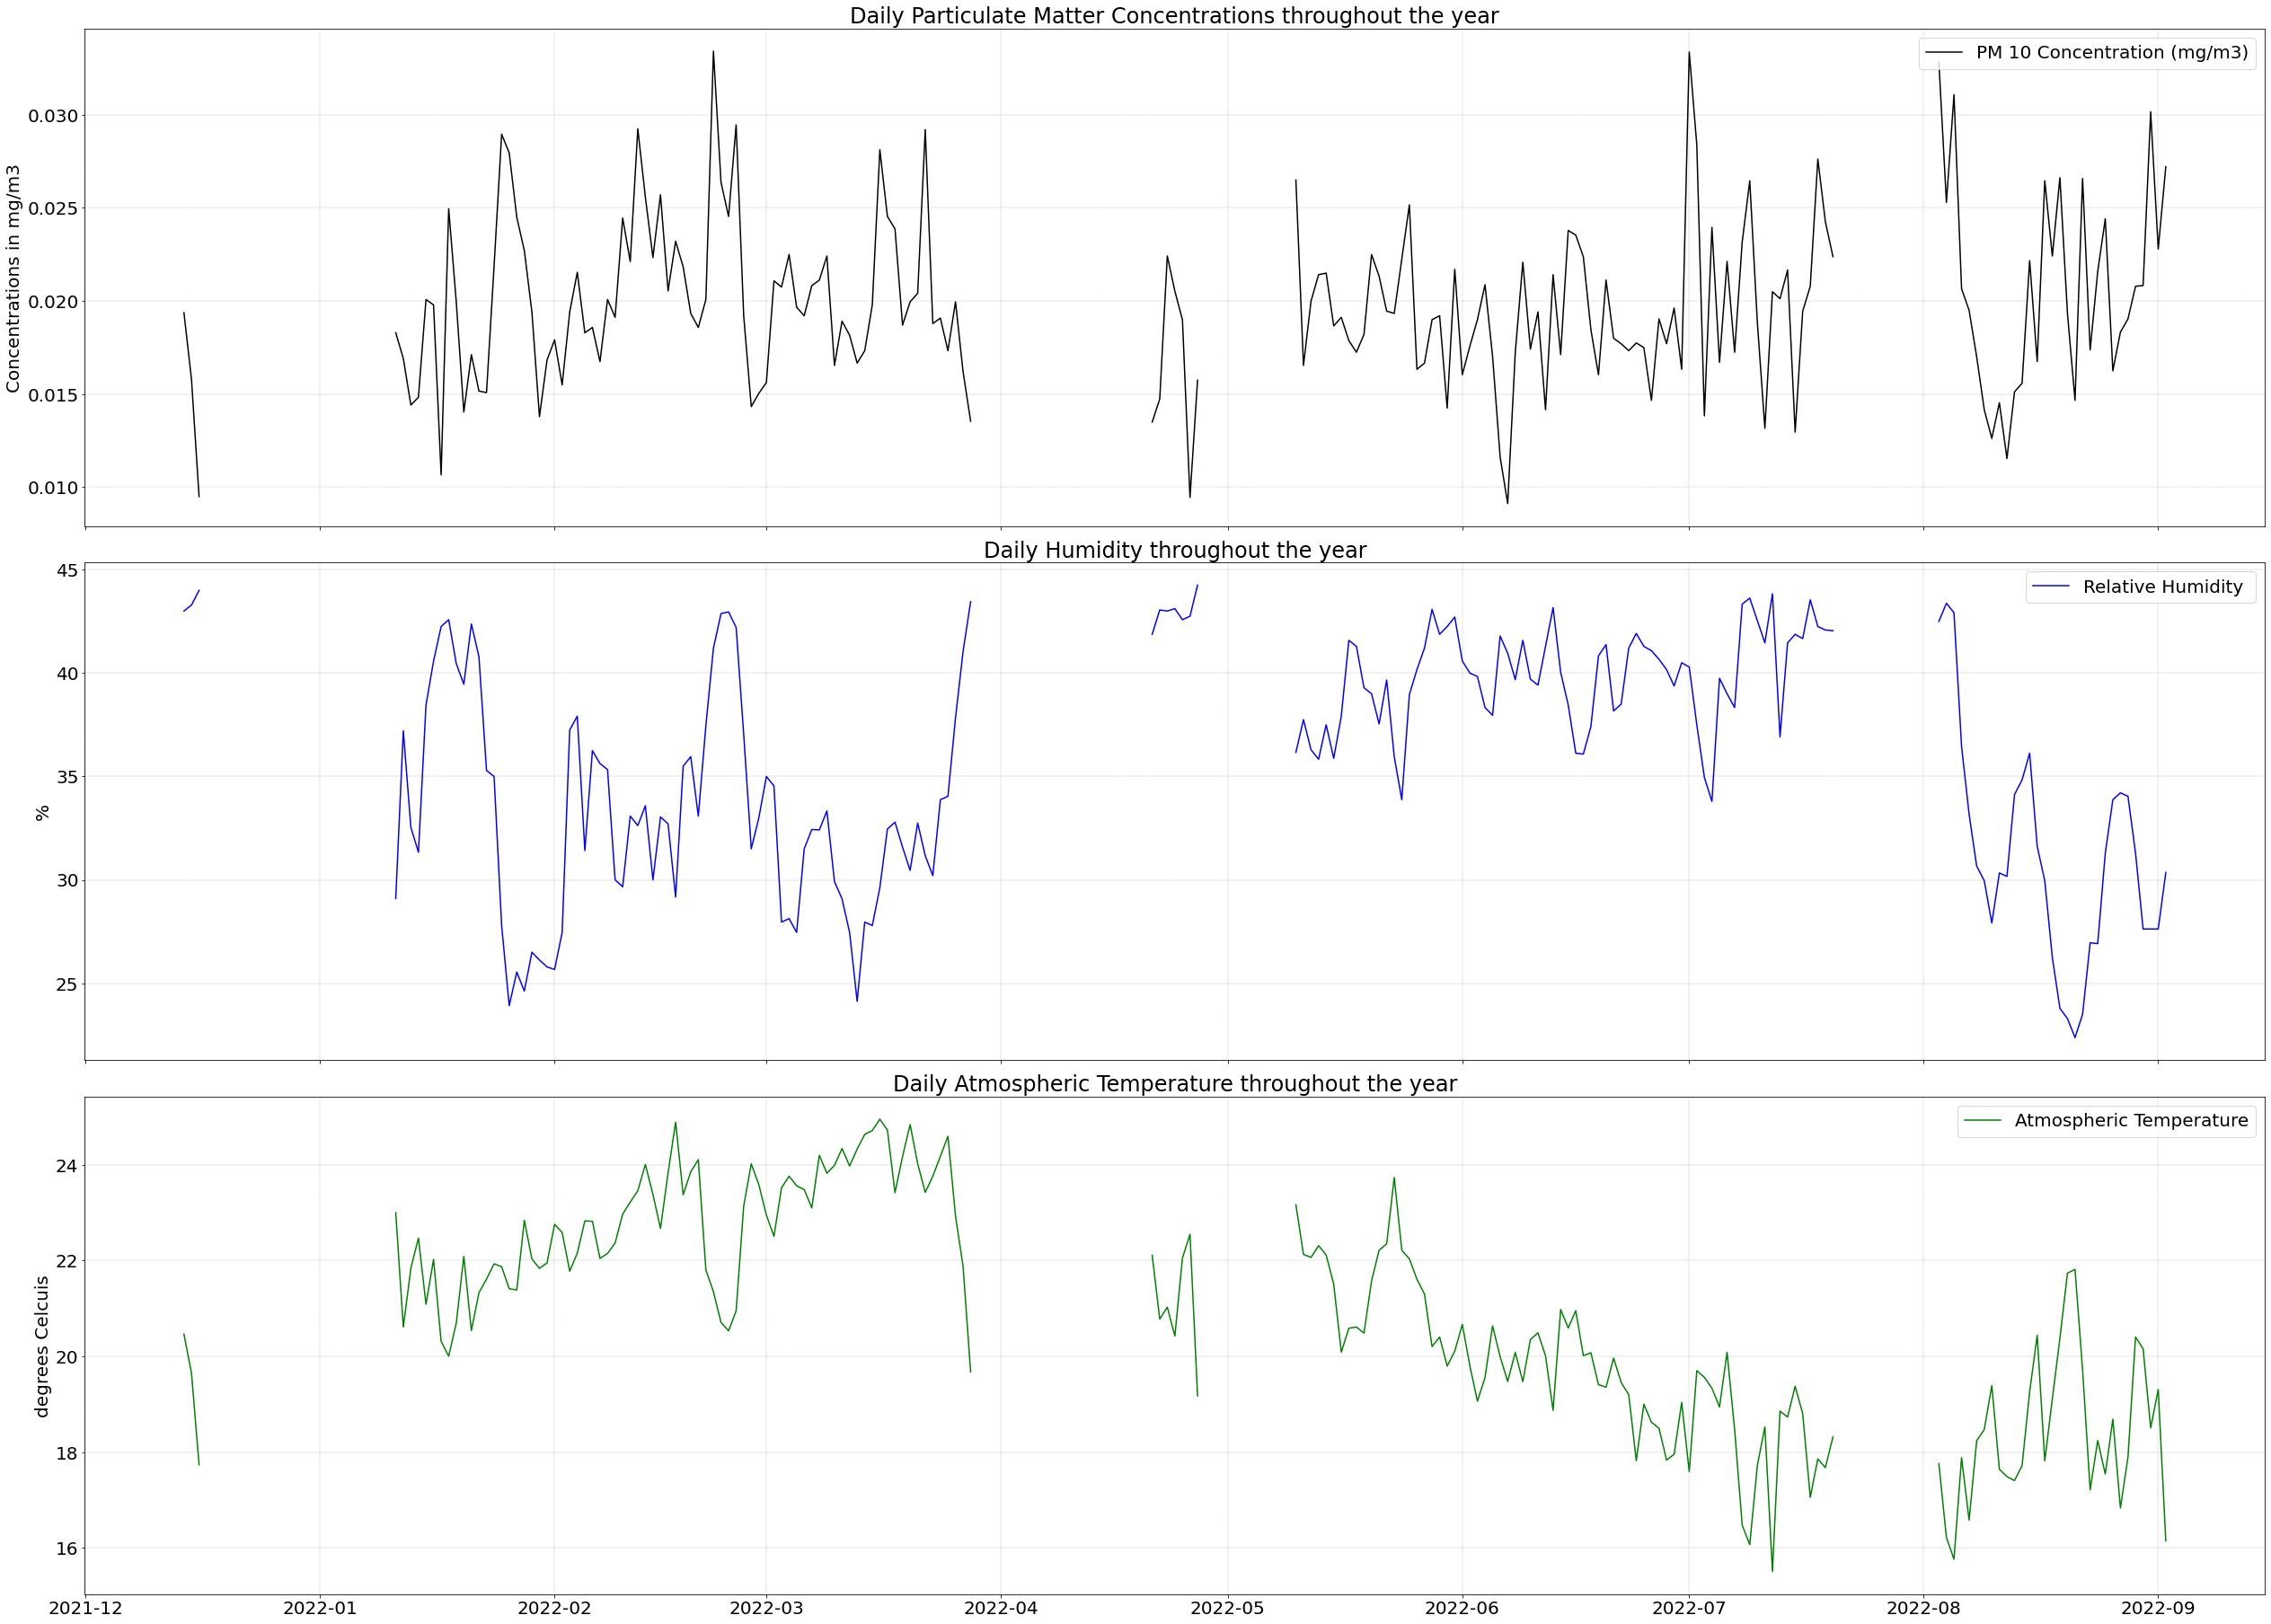

In [19]:
# Plotting hourly variations for the entire monitoring period
fig, (ax0,ax1,ax2) = plt.subplots(3, 1, sharex=True, constrained_layout=True,figsize=(35,25))
    #PM2.5
Nairobi_time_df=Nairobi_clean.set_index('Time').dropna()
Nairobi_time_df
Data_plot=Nairobi_time_df.resample('D')['Conc (mg/m3)','RH (%)','AT (C)'].mean()
ax0.plot(Data_plot.index.values,
            Data_plot['Conc (mg/m3)'],
            color='black',
            label='PM 10 Concentration (mg/m3)') 
ax0.set(ylabel= f"Concentrations in mg/m3",
            title=f"Daily Particulate Matter Concentrations throughout the year")
ax0.legend(loc="upper right")
ax0.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# Plot of Relative Humidity Variation throughout the year
ax1.plot(Data_plot.index.values,
            Data_plot['RH (%)'],
            color='blue',
            label='Relative Humidity ') 
ax1.set(ylabel= f"%",
            title=f"Daily Humidity throughout the year")
ax1.legend(loc="upper right")
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.3)  
# Plot of Temperature Variation throughout the year
ax2.plot(Data_plot.index.values,
            Data_plot['AT (C)'],
            color='green',
            label='Atmospheric Temperature') 
ax2.set(ylabel= f"degrees Celcuis",
            title=f"Daily Atmospheric Temperature throughout the year")
ax2.legend(loc="upper right")
ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.3)  


In [20]:
Nairobi_time_df.resample('60min')['Conc (mg/m3)','RH (%)','AT (C)'].mean()

,Conc (mg/m3),RH (%),AT (C)
Time,,,
2021-12-14 16:00:00,0.018,42.0,23.3
2021-12-14 17:00:00,0.017,44.0,22.8
2021-12-14 18:00:00,0.020,43.0,21.5
2021-12-14 19:00:00,0.024,43.0,20.1
2021-12-14 20:00:00,0.026,43.0,19.8
...,...,...,...
2022-09-02 09:00:00,0.027,32.0,15.8
2022-09-02 10:00:00,0.039,32.0,16.4
2022-09-02 11:00:00,0.047,33.0,17.0


## Duirnal Patterns


In [21]:
# A function for Hourly hour per month
def duirnal_patterns(df): 
#     month_df=df[df['month']==month_digit]
    df1=df.set_index('Time').dropna()
    hourly_avg=df1.groupby('hour')['Conc (mg/m3)'].mean()
    # Plotting hourly average over the entire monitoring period
    # Plotting a graph of hourly averages
    fig,ax=plt.subplots(figsize=(25,9))
    #PM2.5
    ax.plot(hourly_avg.index.values,
            hourly_avg.values,
            color='black',
            label=f'Particulate Concentration in mg/m3')    
    ax.set(xlabel="Hour of the Day",
               ylabel= f"Pollutant Concentrations",
               title=f"Duirnal Patterns in Nairobi")
    plt.legend()
    plt.xticks(hourly_avg.index.values)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show() 

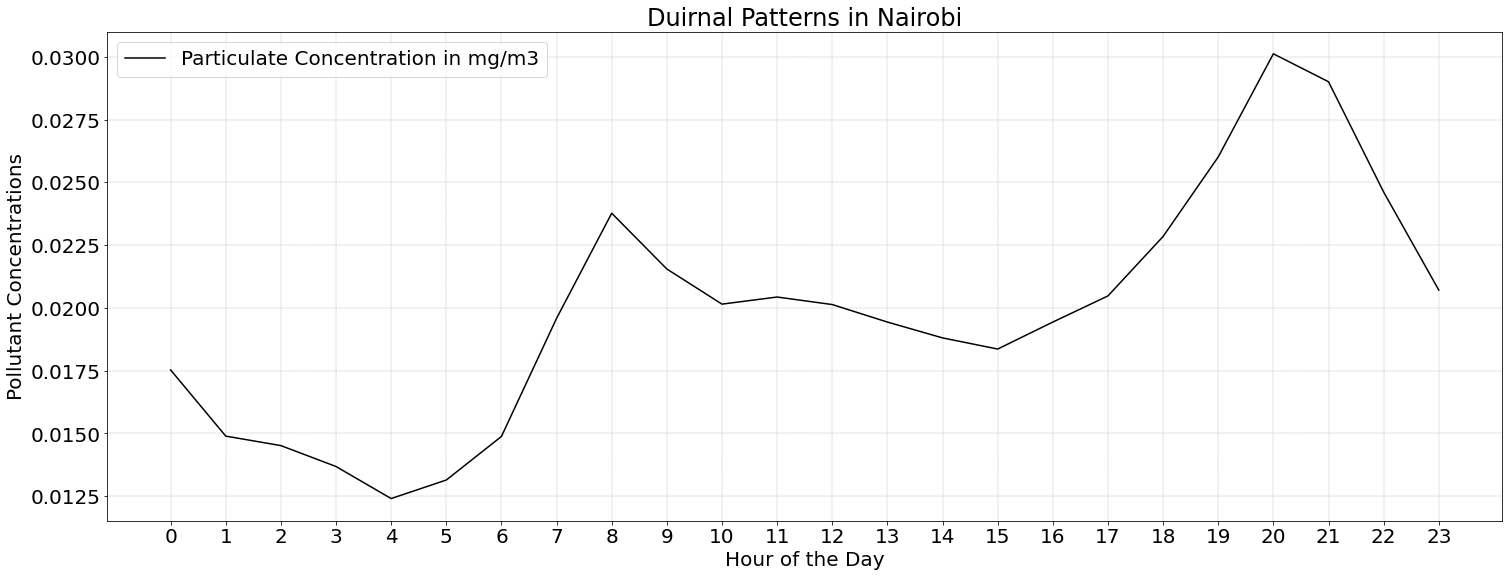

In [22]:
duirnal_patterns(Nairobi_clean)

In [23]:
# Transfer the Clean data to csv
Nairobi_clean.to_csv("/Users/Christine.Muthee/Documents/Nairobi_AQ/Nairobi_data.csv")

## GEOS-CF Comparison 

In [24]:
# importing the necessary libraries to convert netcdf to csv
import xarray as xr
import os
import nctoolkit as nc 
import glob
import math 

In [30]:
Geos_data="/Users/Christine.Muthee/Documents/Nairobi_AQ/Nairobi_geos_data/"
os.listdir(Geos_data)

['aqc_tavg_1hr_g1440x721_v1-202211290721output.24628.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290702output.21006.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290657output.20127.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290704output.21274.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290714output.23131.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290701output.20595.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290724output.24942.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290717output.23910.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290709output.22320.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290659output.20278.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290656output.19939.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202211290713output.23074.webform.nc']

In [31]:
# Set a loop to create a .csv file for each .nc file listed in `files_to_convert`
csv_dir="/Users/Christine.Muthee/Documents/Nairobi_AQ/Nairobi_Geos_csv/"
for filename in os.listdir(Geos_data):
    ds = xr.open_dataset(Geos_data+filename)
    # ds = data.to_xarray(cdo_times = True)
    df = ds.to_dataframe()
    df.to_csv(csv_dir + filename[:-3] + '.csv')
    print(filename + ' has been processed to .csv')

aqc_tavg_1hr_g1440x721_v1-202211290721output.24628.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290702output.21006.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290657output.20127.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290704output.21274.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290714output.23131.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290701output.20595.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290724output.24942.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290717output.23910.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290709output.22320.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290659output.20278.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202211290656output.19939.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x72

In [41]:
csv_files = glob.glob(csv_dir + "/*.csv")
csv_files
geos_outputs_csv=(pd.read_csv(files)for files in csv_files)
all_geos_outputs_csv=pd.concat(geos_outputs_csv,axis=0,ignore_index=True)
all_geos_outputs_csv["time"]=pd.to_datetime(all_geos_outputs_csv["time"])
all_geos_outputs_csv

,time,longitude,latitude,pm25_rh35_gcc
0,2021-11-01 00:30:00,36.0,-2.00,6.988690
1,2021-11-01 00:30:00,36.0,-1.75,9.785565
2,2021-11-01 00:30:00,36.0,-1.50,15.066815
3,2021-11-01 00:30:00,36.0,-1.25,14.988690
4,2021-11-01 00:30:00,36.0,-1.00,12.269940
...,...,...,...,...
707611,2021-06-30 23:30:00,38.0,-1.00,4.538304
707612,2021-06-30 23:30:00,38.0,-0.75,3.311742
707613,2021-06-30 23:30:00,38.0,-0.50,3.022679
707614,2021-06-30 23:30:00,38.0,-0.25,3.319554


In [42]:
# Daily average 
all_geos_outputs_df=all_geos_outputs_csv.set_index("time")["pm25_rh35_gcc"].resample('D').mean()
all_geos_outputs_df

time
2021-01-01     6.614571
2021-01-02     9.927523
2021-01-03     8.268255
2021-01-04     8.286076
2021-01-05    10.660733
                ...    
2021-12-26     5.037364
2021-12-27     5.985918
2021-12-28     6.059391
2021-12-29     5.545369
2021-12-30     7.635017
Freq: D, Name: pm25_rh35_gcc, Length: 364, dtype: float64

In [44]:
Nairobi_clean.head()

Nairobi_clean['Conc (ug/m3)']=Nairobi_clean["Conc (mg/m3)"]*1000
Nairobi_clean


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),hour,day,day_of_week,month,day_of_year,weekday_weekend,Conc (ug/m3)
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3,16,14,1,12,348,1,18.0
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8,17,14,1,12,348,1,17.0
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5,18,14,1,12,348,1,20.0
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1,19,14,1,12,348,1,24.0
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8,20,14,1,12,348,1,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2022-09-02 09:00:00,0.027,0.700,7.9,32,15.8,9,2,4,9,245,1,27.0
6281,2022-09-02 10:00:00,0.039,0.700,8.0,32,16.4,10,2,4,9,245,1,39.0
6282,2022-09-02 11:00:00,0.047,0.700,8.1,33,17.0,11,2,4,9,245,1,47.0
6283,2022-09-02 12:00:00,0.049,0.700,8.2,32,18.7,12,2,4,9,245,1,49.0


In [45]:
Nairobi_RGM=Nairobi_clean.set_index("Time")["Conc (ug/m3)"].resample('D').mean()
Nairobi_RGM

Time
2021-12-14    19.375000
2021-12-15    15.791667
2021-12-16     9.500000
2021-12-17          NaN
2021-12-18          NaN
                ...    
2022-08-29    20.791667
2022-08-30    20.833333
2022-08-31    30.166667
2022-09-01    22.791667
2022-09-02    27.214286
Freq: D, Name: Conc (ug/m3), Length: 263, dtype: float64

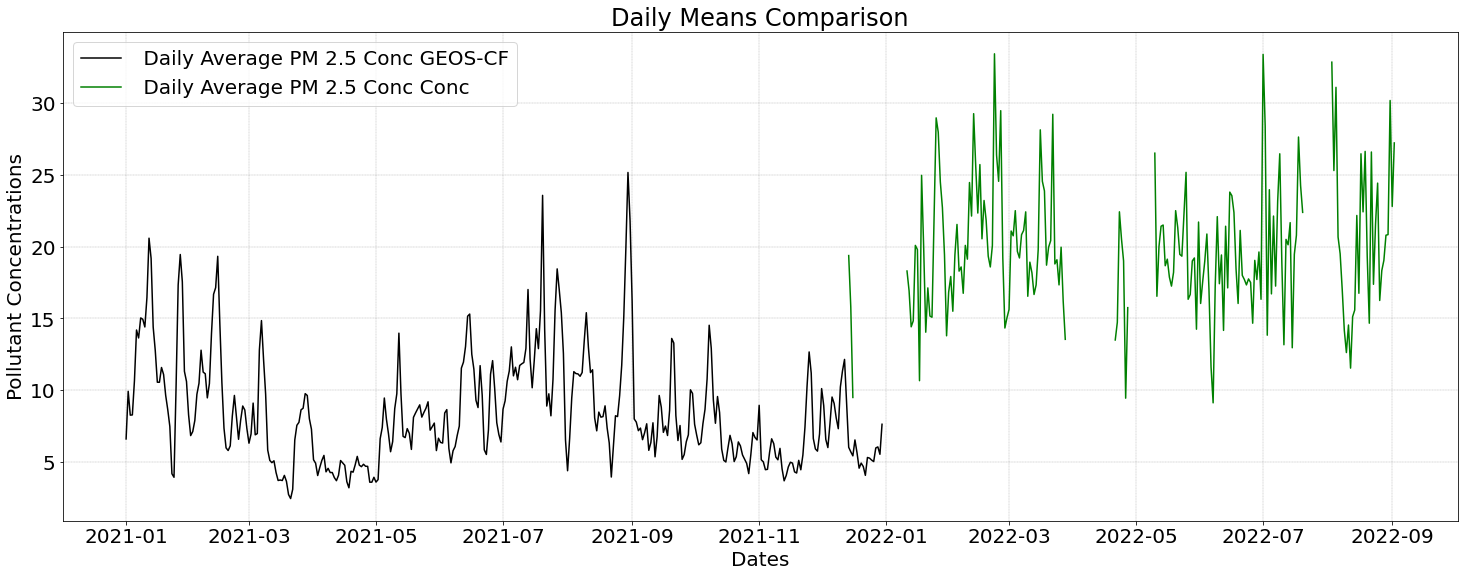

In [48]:
fig,ax=plt.subplots(figsize=(25,9))
#PM2.5
ax.plot(all_geos_outputs_df.index,
        all_geos_outputs_df.values,
        color='black',
        label=f' Daily Average PM 2.5 Conc GEOS-CF')   
# # PM10
ax.plot(Nairobi_RGM.index,
        Nairobi_RGM.values,
        color='green',
        label=f' Daily Average PM 2.5 Conc Conc')   
ax.set(xlabel="Dates",
            ylabel= f"Pollutant Concentrations",
            title=f"Daily Means Comparison")
plt.legend()
# plt.xticks(daily_mean_LCS.index)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show() 